CS 229, Fall 2018
# Problem Set #1: Supervised Learning

## **1. [40 points] Linear Classifiers (logistic regression and GDA)**

In this problem, we cover two probabilistic linear classifiers we have covered in class so far. First, a discriminative linear classifier: logistic regression. Second, a generative linear classifier: Gaussian discriminant analysis (GDA). Both the algorithms find a linear decision boundary that separates the data into two classes, but make different assumptions. Our goal in this problem is to get a deeper understanding of the similarities and differences (and, strengths and weaknesses) of these two algorithms.

For this problem, we will consider two datasets, provided in the following files:

i. `data/ds1_{train, valid}.csv`

ii. `data/ds2_{train, valid}.csv`

Each file contains $m$ examples, one example $\left(x^{(i)}, y^{(i)}\right)$ per row. In particular, the $i$-th row contains columns $x_{0}^{(i)} \in \mathbb{R}, x_{1}^{(i)} \in \mathbb{R}$, and $y^{(i)} \in\{0,1\}$. In the subproblems that follow, we will investigate using logistic regression and Gaussian discriminant analysis (GDA) to perform binary classification on these two datasets.

### **(a)** 
---

[10 points $]$ In lecture we saw the average empirical loss for logistic regression:

$$
J(\theta)=-\frac{1}{m} \sum_{i=1}^{m} y^{(i)} \log \left(h_{\theta}\left(x^{(i)}\right)\right)+\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)
$$

where $y^{(i)} \in\{0,1\}, h_{\theta}(x)=g\left(\theta^{T} x\right)$ and $g(z)=1 /\left(1+e^{-z}\right)$.

Find the Hessian $H$ of this function, and show that for any vector $z$, it holds true that

$$
z^{T} H z \geq 0 .
$$

**Hint:** You may want to start by showing that $\sum_{i} \sum_{j} z_{i} x_{i} x_{j} z_{j}=\left(x^{T} z\right)^{2} \geq 0$. Recall also that $g^{\prime}(z)=g(z)(1-g(z))$.

#### <span style="color:IndianRed">**Solution:**

<span style="color:IndianRed">The gradient of $J(\theta)$:

$$
\color{IndianRed}{
\begin{align*}
\nabla J(\theta) 
&= - {1\over m} \sum_{i = 1}^m {
    {y^{(i)}}\frac{
      h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))
      x^{(i)}
    }{h_{\theta}(x^{(i)})}
  } - (1-y^{(i)})\frac{
    h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))
    x^{(i)}
  }{1-h_\theta(x^{(i)})} \\
&= -{1\over m} \sum_{i = 1}^m ({
		y^{(i)}(1-h_\theta(x^{(i)})) - 
		(1-y^{(i)}) h_\theta(x^{(i)})
	})x^{(i)} \\
&= -{1\over m} \sum_{i = 1}^m ({
		y^{(i)} - h_\theta(x^{(i)})
	})x^{(i)}
\end{align*}
}
$$

<span style="color:IndianRed">The Hessian $H$:

$$
\color{IndianRed}{
H = \nabla^2J(\theta) = {1\over m} \sum_{i = 1}^m 
  h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))
  x^{(i)}(x^{(i)})^T
}
$$

<span style="color:IndianRed">For any vector $z$:

$$
\color{IndianRed}{
\begin{align*}
z^THz &= {1\over m} \sum_{i = 1}^m
  h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))
  z^Tx^{(i)}(x^{(i)})^Tz \\
&= {1\over m} \sum_{i = 1}^m
  h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))
  ((x^{(i)})^Tz)^2 \\
&\ge 0
\end{align*}
}
$$


**Remark:** This is one of the standard ways of showing that the matrix $H$ is positive semidefinite, written " $H \succeq 0$." This implies that $J$ is convex, and has no local minima other than the global one. If you have some other way of showing $H \succeq 0$, you're also welcome to use your method instead of the one above.

### **(b)**
---

[5 points] **Coding problem.** Follow the instructions in src/p01b_logreg.py to train a logistic regression classifier using Newton's Method. Starting with $\theta=\overrightarrow{0}$, run Newton's Method until the updates to $\theta$ are small: Specifically, train until the first iteration $k$ such that $\left\|\theta_{k}-\theta_{k-1}\right\|_{1}<\epsilon$, where $\epsilon=1 \times 10^{-5}$. Make sure to write your model's predictions to the file specified in the code.

#### <span style="color:IndianRed">**Solution:**

In [1]:
import numpy as np
from src import util
from src.linear_model import LinearModel
from numpy import ndarray

def p01b(train_path, eval_path, pred_path):
    """Problem 1(b): Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** TODO: START CODE HERE ***
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    model = LogisticRegression(eps=1e-5)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_eval)

    accuracy = np.sum((y_pred > 0.5) == y_eval) / y_eval.shape[0]
    print('Prediction accuracy is', accuracy)
    util.plot(x_train, y_train, model.theta)
    # *** END CODE HERE ***

class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x: ndarray, y: ndarray):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** TODO: START CODE HERE ***
        m, n = np.shape(x)
        self.theta = np.zeros(n)
        
        while True:
            score: ndarray = 1 / (1 + np.exp(-np.dot(x, self.theta)))
            # likelihood: int = y * np.log(score) + (1 - y) * np.log(1 - score)
            gradient = -np.dot(x.T, y - score) / m
            hessian = np.dot(x.T * score * (1 - score), x) / m
            
            theta_old = self.theta.copy()
            self.theta -= np.linalg.inv(hessian).dot(gradient)
            if np.linalg.norm(self.theta - theta_old) < self.eps:
                break
        # *** END CODE HERE ***

    def predict(self, x: ndarray):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** TODO: START CODE HERE ***
        return 1 / (1 + np.exp(-x.dot(self.theta)))
        # *** END CODE HERE ***

Prediction accuracy is 0.9


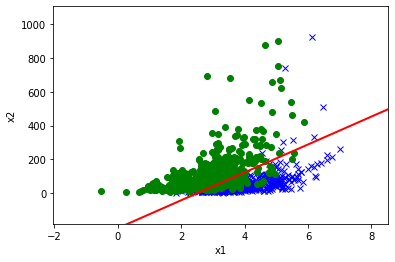

In [2]:
p01b(train_path='./data/ds1_train.csv',
     eval_path='./data/ds1_valid.csv',
     pred_path='output/p01b_pred_1.txt')

Prediction accuracy is 0.91


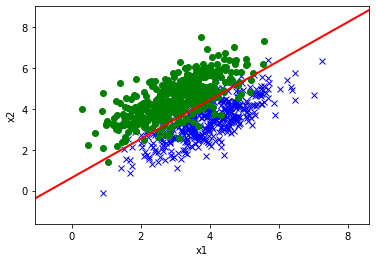

In [3]:
p01b(train_path='./data/ds2_train.csv',
     eval_path='./data/ds2_valid.csv',
     pred_path='output/p01b_pred_2.txt')

### **(c)**
---

[5 points] Recall that in GDA we model the joint distribution of $(x, y)$ by the following equations:

$$
\begin{aligned}
p(y) &= \begin{cases}\phi & \text { if } y=1 \\
1-\phi & \text { if } y=0\end{cases} \\
p(x \mid y=0) &=\frac{1}{(2 \pi)^{n / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x-\mu_{0}\right)^{T} \Sigma^{-1}\left(x-\mu_{0}\right)\right) \\
p(x \mid y=1) &=\frac{1}{(2 \pi)^{n / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x-\mu_{1}\right)^{T} \Sigma^{-1}\left(x-\mu_{1}\right)\right)
\end{aligned}
$$

where $\phi, \mu_{0}, \mu_{1}$, and $\Sigma$ are the parameters of our model.

Suppose we have already fit $\phi, \mu_{0}, \mu_{1}$, and $\Sigma$, and now want to predict $y$ given a new point $x$. To show that GDA results in a classifier that has a linear decision boundary, show the posterior distribution can be written as

$$
p\left(y=1 \mid x ; \phi, \mu_{0}, \mu_{1}, \Sigma\right)=\frac{1}{1+\exp \left(-\left(\theta^{T} x+\theta_{0}\right)\right)},
$$

where $\theta \in \mathbb{R}^{n}$ and $\theta_{0} \in \mathbb{R}$ are appropriate functions of $\phi, \Sigma, \mu_{0}$, and $\mu_{1}$.

#### <span style="color:IndianRed">**Solution:**

<span style="color:IndianRed">Using Bayes rule:

$$
\color{IndianRed}{
\begin{align*}
p(y = 1 | x) &= \frac{p(x | y = 1)p(y = 1)}{p(x)}
\\ &= \frac{p(x|y = 1)p(y = 1)}{p(x|y = 1)p(y = 1) + p(x|y = 0)p(y = 0)}
\\ &= \frac{1}{1 + \frac{p(x|y = 0)p(y = 0)}{p(x|y = 1)p(y = 1)}}
\\ &= \frac{1}
	{1 + {1 - \phi \over \phi}
		e^{
    	\frac{1}{2}\left(x-\mu_{1}\right)^{T} \Sigma^{-1}\left(x-\mu_{1}\right)
    	-\frac{1}{2}\left(x-\mu_{0}\right)^{T} \Sigma^{-1}\left(x-\mu_{0}\right)
    }
	}
\\ &= \frac{1}
	{1 + e^{-(
			(\Sigma^{-1}(\mu_{1}-\mu_{0}))^{T} x
			+ \frac{1}{2}(\mu_{0}+\mu_{1})^{T} \Sigma^{-1}(\mu_{0}-\mu_{1}) - \ln(\frac{1-\phi}{\phi})
		)}
	}
\end{align*}
}
$$

<span style="color:IndianRed">Thus:

$$
\color{IndianRed}{
p\left(y=1 \mid x ; \phi, \mu_{0}, \mu_{1}, \Sigma\right)=\frac{1}{1+\exp \left(-\left(\theta^{T} x+\theta_{0}\right)\right)}
}
$$

<span style="color:IndianRed">where 
$\theta = \Sigma^{-1}(\mu_{1}-\mu_{0})$
, and
$\theta_0 = \frac{1}{2}(\mu_{0}+\mu_{1})^{T} \Sigma^{-1}(\mu_{0}-\mu_{1}) - \ln(\frac{1-\phi}{\phi})$


### **(d)**
---

[7 points] For this part of the problem only, you may assume $n$ (the dimension of $x$ ) is 1 , so that $\Sigma=\left[\sigma^{2}\right]$ is just a real number, and likewise the determinant of $\Sigma$ is given by $|\Sigma|=\sigma^{2}$. Given the dataset, we claim that the maximum likelihood estimates of the parameters are given by

$$
\begin{aligned}
\phi &=\frac{1}{m} \sum_{i=1}^{m} 1\left\{y^{(i)}=1\right\} \\
\mu_{0} &=\frac{\sum_{i=1}^{m} 1\left\{y^{(i)}=0\right\} x^{(i)}}{\sum_{i=1}^{m} 1\left\{y^{(i)}=0\right\}} \\
\mu_{1} &=\frac{\sum_{i=1}^{m} 1\left\{y^{(i)}=1\right\} x^{(i)}}{\sum_{i=1}^{m} 1\left\{y^{(i)}=1\right\}} \\
\Sigma &=\frac{1}{m} \sum_{i=1}^{m}\left(x^{(i)}-\mu_{y^{(i)}}\right)\left(x^{(i)}-\mu_{y^{(i)}}\right)^{T}
\end{aligned}
$$

The log-likelihood of the data is

$$
\begin{aligned}
\ell\left(\phi, \mu_{0}, \mu_{1}, \Sigma\right) &=\log \prod_{i=1}^{m} p\left(x^{(i)}, y^{(i)} ; \phi, \mu_{0}, \mu_{1}, \Sigma\right) \\
&=\log \prod_{i=1}^{m} p\left(x^{(i)} \mid y^{(i)} ; \mu_{0}, \mu_{1}, \Sigma\right) p\left(y^{(i)} ; \phi\right)
\end{aligned}
$$

By maximizing $\ell$ with respect to the four parameters, prove that the maximum likelihood estimates of $\phi, \mu_{0}, \mu_{1}$, and $\Sigma$ are indeed as given in the formulas above. (You may assume that there is at least one positive and one negative example, so that the denominators in the definitions of $\mu_{0}$ and $\mu_{1}$ above are non-zero.)

#### <span style="color:IndianRed">**Solution:**

<span style="color:IndianRed">The log-likelihood of the data in a GDA model is

$$
\color{IndianRed}{
\begin{aligned}
\ell\left(\phi, \mu_{0}, \mu_{1}, \Sigma\right) &= \log \prod_{i=1}^{m} p\left(x^{(i)} \mid y^{(i)} ; \mu_{0}, \mu_{1}, \Sigma\right) p\left(y^{(i)} ; \phi\right)

\\&= \sum_{i=1}^{m} \log p\left(x^{(i)} \mid y^{(i)} ; \mu_{0}, \mu_{1}, \Sigma\right)
+ \sum_{i=1}^{m} \log p\left(y^{(i)} ; \phi\right)
\end{aligned}
}
$$

<span style="color:IndianRed">To calculate $\phi$:

$$
\color{IndianRed}{
p(y^{(i)} ; \phi) = y^{(i)}\phi + (1 - y^{(i)})(1 - \phi)
}
$$

$$
\color{IndianRed}{
\text{let }{\partial\ell \over \partial\phi} = \sum_{i=1}^{m} \frac{2y^{(i)} - 1}{y^{(i)}\phi + (1 - y^{(i)})(1 - \phi)} = 0 \quad\longrightarrow\quad\phi = \frac{1}{m} \sum_{i=1}^{m} 1\left\{y^{(i)}=1\right\}
}
$$

<span style="color:IndianRed">Use the same method to calculate $\mu_0$, $\mu_1$, and $\Sigma$.

### **(e)**
---

[3 points $]$ Coding problem. In `src/p01e_gda.py`, fill in the code to calculate $\phi, \mu_{0}$, $\mu_{1}$, and $\Sigma$, use these parameters to derive $\theta$, and use the resulting GDA model to make predictions on the validation set.

#### <span style="color:IndianRed">**Solution:**

In [4]:
import numpy as np
from src import util
from src.linear_model import LinearModel
from numpy import ndarray

def p01e(train_path, eval_path, pred_path):
    """Problem 1(e): Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)

    # *** TODO: START CODE HERE ***
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    model = GDA()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_eval)

    accuracy = np.sum((y_pred > 0.5) == y_eval) / y_eval.shape[0]
    print('Prediction accuracy is', accuracy)
    util.plot(x_train, y_train, model.theta)
    # *** END CODE HERE ***

class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x: ndarray, y: ndarray):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** TODO: START CODE HERE ***
        m, n = x.shape
        
        phi = np.sum(y) / m
        mu_0 = np.sum(np.reshape(1 - y, (m, 1)) * x, axis=0) / np.sum(1 - y)
        mu_1 = np.sum(np.reshape(y, (m, 1)) * x, axis=0) / np.sum(y)
        mu_y = np.dot((1 - y).reshape((m, 1)), mu_0.reshape((1, n))) \
               + np.dot(y.reshape((m, 1)), mu_1.reshape((1, n)))
        sigma = np.dot((x - mu_y).T, x - mu_y) / m
        
        theta = np.linalg.inv(sigma).dot(mu_1 - mu_0)
        theta_0 = (mu_0 + mu_1).T.dot(-theta) / 2 - np.log((1 - phi) / phi)
        
        self.theta = np.concatenate([[theta_0,], theta])
        return self.theta
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** TODO: START CODE HERE ***
        return 1 / (1 + np.exp(-x.dot(self.theta)))
        # *** END CODE HERE


Prediction accuracy is 0.83


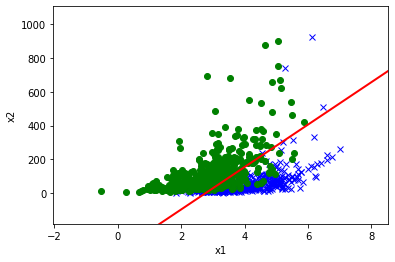

In [5]:
p01e(train_path='./data/ds1_train.csv',
     eval_path='./data/ds1_valid.csv',
     pred_path='output/p01e_pred_1.txt')


Prediction accuracy is 0.91


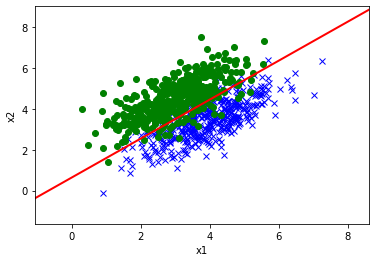

In [6]:
p01e(train_path='./data/ds2_train.csv',
     eval_path='./data/ds2_valid.csv',
     pred_path='output/p01e_pred_2.txt')

### **(f)**
---

[5 points] For Dataset 1 , create a plot of the training data with $x_{1}$ on the horizontal axis, and $x_{2}$ on the vertical axis. To visualize the two classes, use a different symbol for examples $x^{(i)}$ with $y^{(i)}=0$ than for those with $y^{(i)}=1$. On the same figure, plot the decision boundary found by logistic regression in part (b). Make an identical plot with the decision boundary found by GDA in part (e).

#### <span style="color:IndianRed">**Solution:**

In [7]:
import matplotlib.pyplot as plt

def plot_2_model(x, y, theta0, theta1, save_path=None, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.
    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta0: Vector of parameters for logistic regression model.
        theta1: Vector of parameters for Gaussian discriminant analysis model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta0^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2_0 = -(theta0[0] / theta0[2] * correction + theta0[1] / theta0[2] * x1)
    x2_1 = -(theta1[0] / theta1[2] * correction + theta1[1] / theta1[2] * x1)
    plt.plot(x1, x2_0, c='red', linewidth=2)
    plt.plot(x1, x2_1, c='orange', linewidth=2)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)

In [8]:
from src.util import add_intercept

def p01f(train_path, eval_path):
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)

    model0 = LogisticRegression(eps=1e-5)
    model0.fit(add_intercept(x_train), y_train)

    model1 = GDA()
    model1.fit(x_train, y_train)

    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)

    y_pred0 = model0.predict(x_eval)
    accuracy0 = np.sum((y_pred0 > 0.5) == y_eval) / y_eval.shape[0]
    y_pred1 = model1.predict(x_eval)
    accuracy1 = np.sum((y_pred1 > 0.5) == y_eval) / y_eval.shape[0]
    print('LogReg prediction accuracy is', accuracy0)
    print('GDA prediction accuracy is', accuracy1)

    plot_2_model(x_train, y_train, model0.theta, model1.theta)

LogReg prediction accuracy is 0.9
GDA prediction accuracy is 0.83


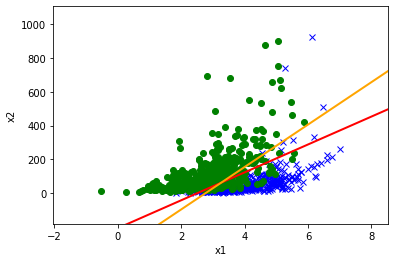

In [9]:
p01f(train_path='./data/ds1_train.csv',
     eval_path='./data/ds1_valid.csv')

### **(g)**
---

[5 points] Repeat the steps in part (f) for Dataset 2. On which dataset does GDA seem to perform worse than logistic regression? Why might this be the case?

#### <span style="color:IndianRed">**Solution:**

LogReg prediction accuracy is 0.91
GDA prediction accuracy is 0.91


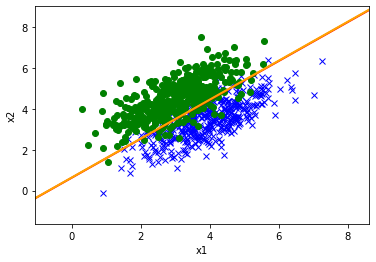

In [10]:
p01f(train_path='./data/ds2_train.csv',
     eval_path='./data/ds2_valid.csv')

#### <span style="color:IndianRed">**Answer:**

<span style="color:IndianRed">On <u>Dataset 1</u> GDA performs worse than logistic regression. The reason is that $p(x|y)$ of Dataset 1 is not Gaussian distributed.

### **(h)**

[3 extra credit points] For the dataset where GDA performed worse in parts (f) and (g), can you find a transformation of the $x^{(i)}$ 's such that GDA performs significantly better? What is this transformation?

## **2. [30 points] Incomplete, Positive-Only Labels**

In this problem we will consider training binary classifiers in situations where we do not have full access to the labels. In particular, we consider a scenario, which is not too infrequent in real life, where we have labels only for a subset of the positive examples. All the negative examples and the rest of the positive examples are unlabelled.

That is, we assume a dataset $\left\{\left(x^{(i)}, t^{(i)}, y^{(i)}\right)\right\}_{i=1}^{m}$, where $t^{(i)} \in\{0,1\}$ is the "true" label, and where

$$
y^{(i)}= \begin{cases}1 & x^{(i)} \text { is labeled } \\ 0 & \text { otherwise. }\end{cases}
$$

All labeled examples are positive, which is to say $p\left(t^{(i)}=1 \mid y^{(i)}=1\right)=1$, but unlabeled examples may be positive or negative. Our goal in the problem is to construct a binary classifier $h$ of the true label $t$, with only access to the partial labels $y$. In other words, we want to construct $h$ such that $h\left(x^{(i)}\right) \approx p\left(t^{(i)}=1 \mid x^{(i)}\right)$ as closely as possible, using only $x$ and $y$.

*Real world example: Suppose we maintain a database of proteins which are involved in transmitting signals across membranes. Every example added to the database is involved in a signaling process, but there are many proteins involved in cross-membrane signaling which are missing from the database. It would be useful to train a classifier to identify proteins that should be added to the database. In our notation, each example $x^{(i)}$ corresponds to a protein, $y^{(i)}=1$ if the protein is in the database and $0$ otherwise, and $t^{(i)}=1$ if the protein is involved in a cross-membrane signaling process and thus should be added to the database, and $0$ otherwise.*

### **(a)**
---

[5 points] Suppose that each $y^{(i)}$ and $x^{(i)}$ are conditionally independent given $t^{(i)}$ :

$$
p\left(y^{(i)}=1 \mid t^{(i)}=1, x^{(i)}\right)=p\left(y^{(i)}=1 \mid t^{(i)}=1\right) .
$$

Note this is equivalent to saying that labeled examples were selected uniformly at random from the set of positive examples. Prove that the probability of an example being labeled differs by a constant factor from the probability of an example being positive. That is, show that $p\left(t^{(i)}=1 \mid x^{(i)}\right)=p\left(y^{(i)}=1 \mid x^{(i)}\right) / \alpha$ for some $\alpha \in \mathbb{R}$.

#### <span style="color:IndianRed">**Solution:**

<span style="color:IndianRed">Using Bayes rule:

$$
\color{IndianRed}{
\begin{align*}
p(t^{(i)}=1, y^{(i)}=1, x^{(i)}) 
&= p(t^{(i)}=1 \mid x^{(i)}) p(x^{(i)}) p(y^{(i)}=1 \mid t^{(i)}=1, x^{(i)})
\\&= p(y^{(i)}=1 \mid x^{(i)}) p(x^{(i)}) p(t^{(i)}=1 \mid y^{(i)}=1, x^{(i)})
\end{align*}
}
$$

<span style="color:IndianRed">Since
$p(t^{(i)}=1 \mid y^{(i)}=1, x^{(i)}) = 1$, and
$p(y^{(i)}=1 \mid t^{(i)}=1, x^{(i)}) = p(y^{(i)}=1 \mid t^{(i)}=1)$

$$
\color{IndianRed}{
\longrightarrow\quad p(t^{(i)}=1 \mid x^{(i)}) = p(y^{(i)}=1 \mid x^{(i)}) / \alpha
}
$$

<span style="color:IndianRed">where $\alpha = p(y^{(i)}=1 \mid t^{(i)}=1)$


### **(b)**
---

[5 points] Suppose we want to estimate $\alpha$ using a trained classifier $h$ and a held-out validation set $V$. Let $V_{+}$be the set of labeled (and hence positive) examples in $V$, given by $V_{+}=$ $\left\{x^{(i)} \in V \mid y^{(i)}=1\right\}$. Assuming that $h\left(x^{(i)}\right) \approx p\left(y^{(i)}=1 \mid x^{(i)}\right)$ for all examples $x^{(i)}$, show that

$$
h\left(x^{(i)}\right) \approx \alpha \text { for all } x^{(i)} \in V_{+} .
$$

You may assume that $p\left(t^{(i)}=1 \mid x^{(i)}\right) \approx 1$ when $x^{(i)} \in V_{+}$.

#### <span style="color:IndianRed">**Solution:**

<span style="color:IndianRed">for all $x^{(i)} \in V_+$, since $p\left(t^{(i)}=1 \mid x^{(i)}\right) \approx 1$

$$
\color{IndianRed}{
\begin{align*}
h(x^{(i)}) 
&\approx p(y^{(i)}=1 \mid x^{(i)})
\\& = \alpha \cdot p(t^{(i)}=1 \mid x^{(i)})
\\& \approx \alpha
\end{align*}}
$$

### **(c)**
---

[5 points ] Coding problem. The following three problems will deal with a dataset which we have provided in the following files:

`data/ds3_{train, valid, test}.csv`

Each file contains the following columns: $x_{1}, x_{2}, y$, and $t$. As in Problem 1 , there is one example per row.
First we will consider the ideal case, where we have access to the true $t$-labels for training. In `src/p02cde_posonly`, write a logistic regression classifier that uses $x_{1}$ and $x_{2}$ as input features, and train it using the $t$-labels (you can ignore the $y$-labels for this part). Output the trained model's predictions on the test set to the file specified in the code.

#### **(d)**

[5 points] Coding problem. We now consider the case where the $t$-labels are unavailable, so you only have access to the $y$-labels at training time. Add to your code in `p02cde_posonly.py` to re-train the classifier (still using $x_{1}$ and $x_{2}$ as input features), but using the $y$-labels only.

#### **(e)**

[10 points] Coding problem. Using the validation set, estimate the constant $\alpha$ by averaging your classifier's predictions over all labeled examples in the validation set:

$$
\alpha \approx \frac{1}{\left|V_{+}\right|} \sum_{x^{(i)} \in V_{+}} h\left(x^{(i)}\right)
$$

Add code in `src/p02cde_posonly` by to rescale your classifier's predictions from part (d) using the estimated value for $\alpha$.
Finally, using a threshold of $p\left(t^{(i)}=1 \mid x^{(i)}\right)=0.5$, make three separate plots with the decision boundaries from parts (c) - (e) plotted on top of the test set. Plot $x_{1}$ on the horizontal axis and $x_{2}$ on the vertical axis, and use two different symbols for the positive $\left(t^{(i)}=1\right)$ and negative $\left(t^{(i)}=0\right)$ examples. In each plot, indicate the separating hyperplane with a red line.

#### <span style="color:IndianRed">**Solution:**

In [11]:
import numpy as np
from src import util

def p02(train_path, valid_path, test_path, pred_path):
    """Problem 2: Logistic regression for incomplete, positive-only labels.

    Run under the following conditions:
        1. on y-labels,
        2. on l-labels,
        3. on l-labels with correction factor alpha.

    Args:
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    # *** TODO: START CODE HERE ***
    x_valid, t_valid = util.load_dataset(valid_path, label_col='t', add_intercept=True)
    _, y_valid = util.load_dataset(valid_path, label_col='y')
    x_train, t_train = util.load_dataset(train_path, label_col='t', add_intercept=True)
    _, y_train = util.load_dataset(train_path, label_col='y')
    x_test, t_test = util.load_dataset(test_path, label_col='t', add_intercept=True)
    # Part (c): Train and test on true labels
    # Make sure to save outputs to pred_path_c
    model = LogisticRegression()
    model.fit(x_train, t_train)
    t_pred = model.predict(x_valid)

    print('(c): Prediction accuracy is', np.sum((t_pred > 0.5) == t_valid) / t_valid.shape[0])
    util.plot(x_test, t_test, model.theta)
    # Part (d): Train on y-labels and test on true labels
    # Make sure to save outputs to pred_path_d
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_valid)

    print('(d): Prediction accuracy is', np.sum((y_pred > 0.5) == t_valid) / t_valid.shape[0])
    util.plot(x_test, t_test, model.theta)
    # Part (e): Apply correction factor using validation set and test on true labels
    # Plot and use np.savetxt to save outputs to pred_path_e
    alpha = np.sum(y_pred[y_valid == 1]) / np.sum(y_valid)
    y_pred = y_pred / alpha
    
    print('(e): Prediction accuracy is', np.sum((y_pred > 0.5) == t_valid) / t_valid.shape[0])
    util.plot(x_test, t_test, model.theta, correction=alpha)
    # *** END CODER HERE

(c): Prediction accuracy is 0.9596774193548387
(d): Prediction accuracy is 0.5
(e): Prediction accuracy is 0.9516129032258065


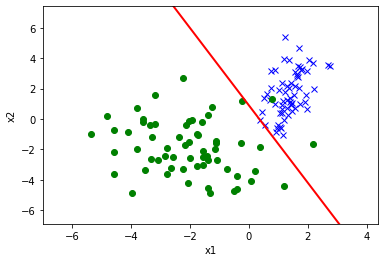

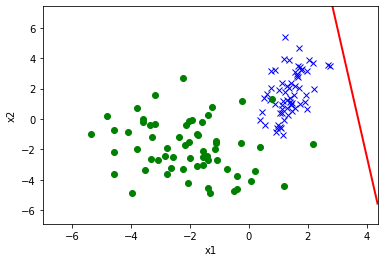

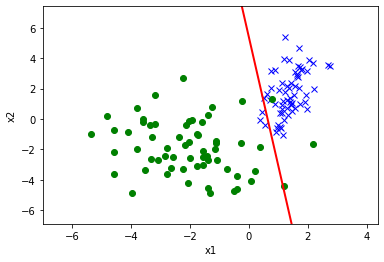

In [12]:
p02(train_path='./data/ds3_train.csv',
    valid_path='./data/ds3_valid.csv',
    test_path='./data/ds3_test.csv',
    pred_path='output/p02X_pred.txt')

**Remark:** We saw that the true probability $p(t \mid x)$ was only a constant factor away from $p(y \mid x)$. This means, if our task is to only rank examples (i.e. sort them) in a particular order (e.g, sort the proteins in order of being most likely to be involved in transmitting signals across membranes), then in fact we do not even need to estimate $\alpha$. The rank based on $p(y \mid x)$ will agree with the rank based on $p(t \mid x)$.

## **3. [25 points] Poisson Regression**



### **(a)**
---

[5 points] Consider the Poisson distribution parameterized by $\lambda$ :

$$
p(y ; \lambda)=\frac{e^{-\lambda} \lambda^{y}}{y !} .
$$

Show that the Poisson distribution is in the exponential family, and clearly state the values for $b(y), \eta, T(y)$, and $a(\eta)$.


#### <span style="color:IndianRed">**Solution:**

$$
\color{IndianRed}{
\begin{align*}
p(y ; \lambda)
&= \frac{e^{-\lambda} \lambda^{y}}{y !}
\\&= {1\over y!}\exp(\log\lambda\cdot y - \lambda)
\end{align*}
}
$$

<span style="color:IndianRed">Thus, the natural parameter is given by $\eta = \log \lambda$. Therefore $\lambda = e^\eta$:

$$
\color{IndianRed}{
\begin{aligned}
T(y) &=y \\
a(\eta) &= \lambda \\
&=e^\eta \\
b(y) &= {1\over y!}
\end{aligned}
}
$$


### **(b)**
---

 [3 points] Consider performing regression using a GLM model with a Poisson response variable. What is the canonical response function for the family? (You may use the fact that a Poisson random variable with parameter $\lambda$ has mean $\lambda$.)



#### <span style="color:IndianRed">**Solution:**

$$
\color{IndianRed}{
g(\eta) = E[T(y);\eta] = {\partial\over \partial\eta}a(\eta) = e^\eta
}
$$

### **(c)**
---

[7 points] For a training set $\left\{\left(x^{(i)}, y^{(i)}\right) ; i=1, \ldots, m\right\}$, let the log-likelihood of an example be $\log p\left(y^{(i)} \mid x^{(i)} ; \theta\right)$. By taking the derivative of the log-likelihood with respect to $\theta_{j}$, derive the stochastic gradient ascent update rule for learning using a GLM model with Poisson responses $y$ and the canonical response function.


#### <span style="color:IndianRed">**Solution:**

<span style="color:IndianRed">The hypothesis is:

$$
\color{IndianRed}{
h_{\theta}(x) = E[y \mid x ; \theta] = \lambda = e^\eta = e^{\theta^{T} x}
}
$$

<span style="color:IndianRed">For GLM models, the stochastic gradient ascent update rule is:

$$
\color{IndianRed}{
\begin{align*}
\theta_{j}:
&=\theta_{j}+\alpha(y^{(i)}-h_{\theta}(x^{(i)})) x_{j}^{(i)}\\
&=\theta_{j}+\alpha(y^{(i)}-e^{\theta^{T} x^{(i)}}) x_{j}^{(i)}
\end{align*}
}
$$


### **(d)**
---

[7 points] **Coding problem.** Consider a website that wants to predict its daily traffic. The website owners have collected a dataset of past traffic to their website, along with some features which they think are useful in predicting the number of visitors per day. The dataset is split into train/valid/test sets and follows the same format as Datasets 1-3:

`data/ds4_{train, valid}.csv`

We will apply Poisson regression to model the number of visitors per day. Note that applying Poisson regression in particular assumes that the data follows a Poisson distribution whose natural parameter is a linear combination of the input features $\left(\right.$ i.e., $\left.\eta=\theta^{T} x\right)$. In `src/p03d_poisson.py`, implement Poisson regression for this dataset and use gradient ascent to maximize the log-likelihood of $\theta$.

#### <span style="color:IndianRed">**Solution:**

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from src import util
from src.linear_model import LinearModel
from numpy import ndarray

def p03(lr, train_path, eval_path, pred_path):
    """Problem 3(d): Poisson regression with gradient ascent.

    Args:
        lr: Learning rate for gradient ascent.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)

    # *** START CODE HERE ***
    # Fit a Poisson Regression mo del
    model = PoissonRegression(step_size=lr)
    model.fit(x_train, y_train)
    # Run on the validation set, and use np.savetxt to save outputs to pred_path
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=False)
    y_pred = model.predict(x_eval)

    plt.plot(y_eval, y_pred, 'bx')
    plt.xlabel('true counts')
    plt.ylabel('predict counts')
    # *** END CODE HERE ***


class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        m, n = np.shape(x)
        self.theta = np.zeros(n)
        while True:
            score = np.exp(np.dot(x, self.theta))
            theta_old = self.theta.copy()
            self.theta += self.step_size * x.T.dot(y - score) / m
            if np.linalg.norm(self.theta - theta_old) < self.eps:
                break
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Floating-point prediction for each input, shape (m,).
        """
        # *** START CODE HERE ***
        return np.exp(np.dot(x, self.theta))
        # *** END CODE HERE ***

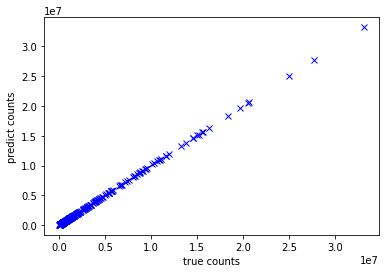

In [14]:
p03(lr=1e-7,
    train_path='./data/ds4_train.csv',
    eval_path='./data/ds4_valid.csv',
    pred_path='output/p03d_pred.txt')

## **4. [15 points] Convexity of Generalized Linear Models**

In this question we will explore and show some nice properties of Generalized Linear Models, specifically those related to its use of Exponential Family distributions to model the output.

Most commonly, GLMs are trained by using the negative log-likelihood (NLL) as the loss function. This is mathematically equivalent to Maximum Likelihood Estimation (i.e., maximizing the log-likelihood is equivalent to minimizing the negative log-likelihood). In this problem, our goal is to show that the NLL loss of a GLM is a convex function w.r.t the model parameters. As a reminder, this is convenient because a convex function is one for which any local minimum is also a global minimum.

To recap, an exponential family distribution is one whose probability density can be represented

$$
p(y ; \eta)=b(y) \exp \left(\eta^{T} T(y)-a(\eta)\right)
$$

where $\eta$ is the natural parameter of the distribution. Moreover, in a Generalized Linear Model, $\eta$ is modeled as $\theta^{T} x$, where $x \in \mathbb{R}^{n}$ are the input features of the example, and $\theta \in \mathbb{R}^{n}$ are learnable parameters. In order to show that the NLL loss is convex for GLMs, we break down the process into sub-parts, and approach them one at a time. Our approach is to show that the second derivative (i.e., Hessian) of the loss w.r.t the model parameters is Positive Semi-Definite (PSD) at all values of the model parameters. We will also show some nice properties of Exponential Family distributions as intermediate steps.

For the sake of convenience we restrict ourselves to the case where $\eta$ is a scalar. Assume $p(Y \mid X ; \theta) \sim$ ExponentialFamily $(\eta)$, where $\eta \in \mathbb{R}$ is a scalar, and $T(y)=y$. This makes the exponential family representation take the form

$$
p(y ; \eta)=b(y) \exp (\eta y-a(\eta)) .
$$



### **(a)** 
---

[5 points] Derive an expression for the mean of the distribution. Show that $\mathbb{E}[Y \mid X ; \theta]$ can be represented as the gradient of the log-partition function $a$ with respect to the natural parameter $\eta$.

**Hint:** Start with observing that $\frac{\partial}{\partial \eta} \int p(y ; \eta) d y=\int \frac{\partial}{\partial \eta} p(y ; \eta) d y$.



#### <span style="color:IndianRed">**Solution:**

$$
\color{IndianRed}{
\begin{align*}
\frac{\partial}{\partial \eta} p(y ; \eta) 
&= \frac{\partial}{\partial \eta} b(y) \exp (\eta y-a(\eta)) \\
&= (y - \frac{\partial a(\eta)}{\partial \eta}) 
	b(y) \exp (\eta y-a(\eta)) \\
&= p(y;\eta) (y - \frac{\partial a(\eta)}{\partial \eta}) & (1)
\end{align*}
}
$$

<span style="color:IndianRed">Observing that

$$
\color{IndianRed}{
\begin{align*}
\frac{\partial}{\partial \eta} \int p(y ; \eta) d y
&=\int \frac{\partial}{\partial \eta} p(y ; \eta) d y \\
&=\int p(y;\eta) (y - \frac{\partial a(\eta)}{\partial \eta}) d y \\
&=\int  p(y;\eta) y d y - 
	\frac{\partial a(\eta)}{\partial \eta} \int p(y;\eta) d y \\
\end{align*}
}
$$

<span style="color:IndianRed">Thus,

$$
\color{IndianRed}{
\begin{align*}
E[Y\mid X;\theta] 
&= \int p(y;\eta) y d y \\
&= \frac{\partial}{\partial \eta} \int p(y ; \eta) d y + 
	\frac{\partial a(\eta)}{\partial \eta} \int p(y;\eta) d y \\
&= \frac{\partial}{\partial \eta} 1 +
	\frac{\partial a(\eta)}{\partial \eta} 1 \\
&= \frac{\partial a(\eta)}{\partial \eta}
\end{align*}
}
$$


### **(b)**
---

[5 points] Next, derive an expression for the variance of the distribution. In particular, show that $\operatorname{Var}(Y \mid X ; \theta)$ can be expressed as the derivative of the mean w.r.t $\eta$ (i.e., the second derivative of the log-partition function $a(\eta)$ w.r.t the natural parameter $\eta$.)



#### <span style="color:IndianRed">**Solution:**

$$
\color{IndianRed}{
\begin{align*}
\operatorname{Var}[Y\mid X;\theta]
&= E[Y^2\mid X;\theta] - E[Y\mid X;\theta]^2 \\
&= \int p(y;\eta)y^2dy - \left(\int p(y;\eta)ydy\right)^2 \\
&= \int p(y;\eta)\left(y - \int yp(y;\eta)dy\right)ydy \\
&= \int p(y;\eta) (y - \frac{\partial a(\eta)}{\partial \eta}) ydy \\
&= \int \frac{\partial}{\partial \eta} p(y ; \eta) ydy & (5)\\
&= \frac{\partial}{\partial \eta} \int p(y ; \eta) ydy \\
&= \frac{\partial^2 a(\eta)}{\partial \eta^2}
\end{align*}
}
$$

<span style="color:IndianRed">**Remark:** Fifth equation uses equation $(1)$ in (a)

### **(c)**
---

[5 points] Finally, write out the loss function $\ell(\theta)$, the NLL of the distribution, as a function of $\theta$. Then, calculate the Hessian of the loss w.r.t $\theta$, and show that it is always PSD. This concludes the proof that NLL loss of GLM is convex.

**Hint:** Use the chain rule of calculus along with the results of the previous parts to simplify your derivations.



#### <span style="color:IndianRed">**Solution:**

**Remark:** The main takeaways from this problem are:
- Any GLM model is convex in its model parameters.
- The exponential family of probability distributions are mathematically nice. Whereas calculating mean and variance of distributions in general involves integrals (hard), surprisingly we can calculate them using derivatives (easy) for exponential family.